## Dataset

The dataset which is going to be used in this research is from Kaggle.com which contains the 13 features on the basis one can predict whether a user is suffering from heart disease or not. Following are the 13 features and a target label which is representing whether a user have heart disease or not.


age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = left ventricular hypertrophy by Estes' criteria)

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)

ca - number of major vessels (0-3) colored by flourosopy

thal - (3 = normal; 6 = fixed defect; 7 = reversable defect)

target - have disease or not (1=yes, 0=no)

# 1) Preprocessing

Before giving an input to machine learning model, it is important to perform certain actions on the data to improve the performance of the model.

In this section we will visualize the number of classes in target label. We will see that how many samples of data have 
heart disease and and how many samples of dataset does not have heart disease. Further more we will create some bar graphs to have a look into the better visualization of dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Work and Learning\University\7th Semester\Data Warehouse and Data Mining\Lab\Terminal\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

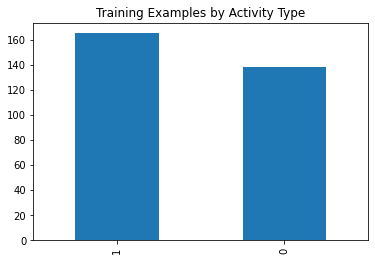

In [5]:
df['target'].value_counts().plot(kind='bar', title='Training Examples by Activity Type')
plt.show()

The Above figure showing the distribution of classes is almost equal which means there is no chance of imbalance dataset in our case. So, not to worry about the classes distribution.

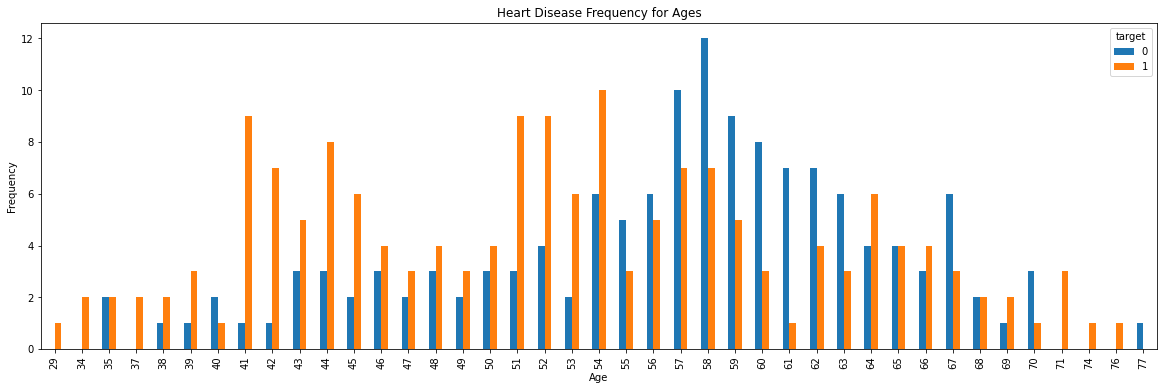

In [6]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

The above graph represents the frequency of Ages for persons who are having a heart disease or not. Above graph is showing that a person having age ranging from 36 to 54 is most likely to have a heart disease.

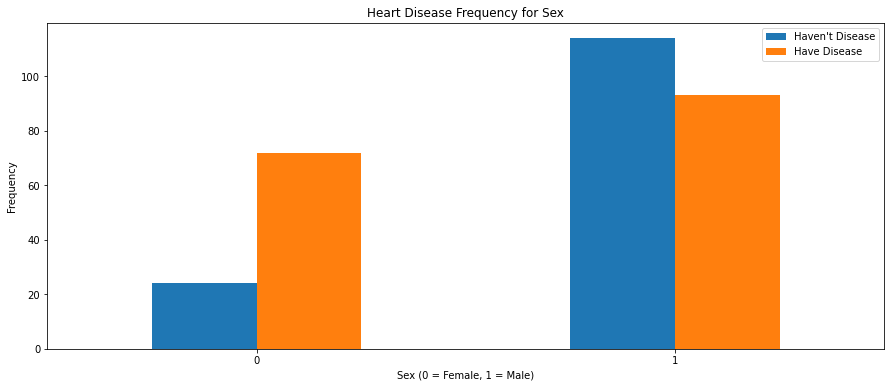

In [7]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

The above graph represents the frequency of Sex for persons who are having a heart disease or not. Above graph is showing that the ratio of female having heart disease is higher than the male.

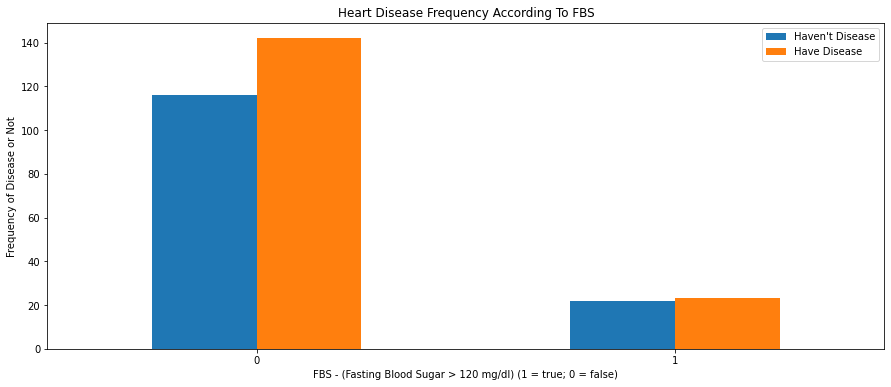

In [8]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

The above graph represents the frequency of Fasting Blood Sugar (FBS) for persons who are having heart disease or not. Above graph is showing that the person having FBS lower than 120 mg/dl is more likely to have heart disease than the ones who have FBS higher than 120 mg/dl.

### Co Relation Metrix

The matrix actually shows that how many independent features are actually co related with each other and also with the target label. The values lies in between -1 to 1 and if the values are nearer to -1 that means that the two features are negatively co related and if the value is equal to 0 that means that the features have no relation with each other and if the values of two features are nearer to 1 that means that these two features are highly co related.

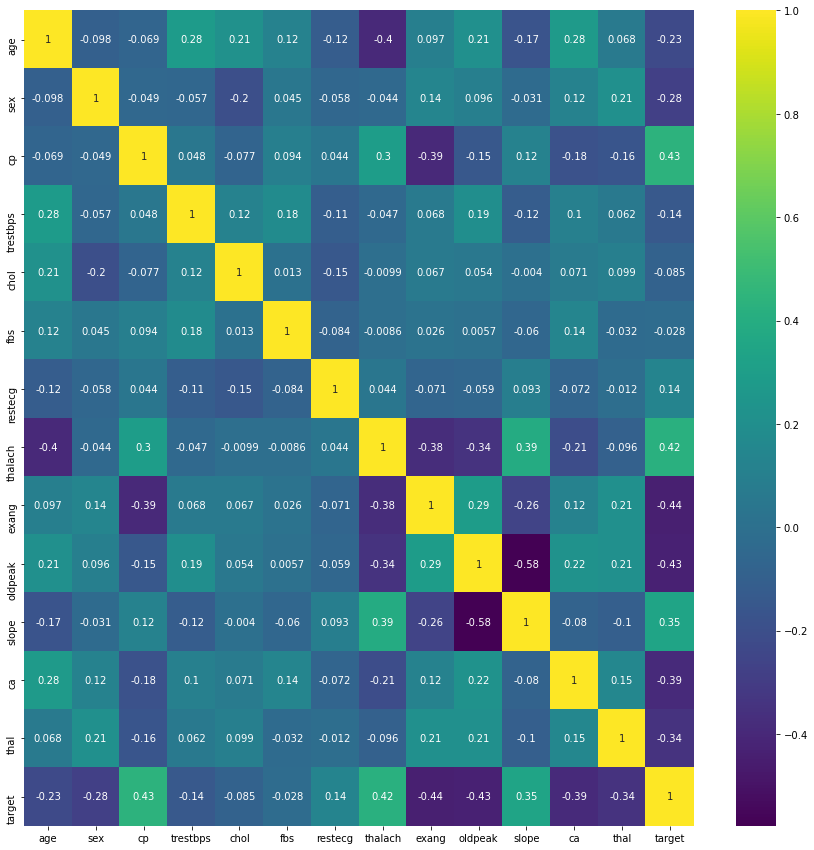

In [9]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="viridis")

### Feature Scaling

To scale down the features ‘MinMaxScaler’ was used from sklearn package which provide a function for scaling down the features. As few features are representing the classes in numeric form such as ‘Sex’ [0=Female, 1=Male] so, these types of features were not taken into consideration for scaling. Scaling was performed on ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] only because these were the actual numeric features and the rest were representing classes as shown in Dataset Section above. The dataset after scaling is shown below.


In [10]:
features = df.loc[:, ['age','trestbps','chol','thalach','oldpeak']]
y = df.iloc[:, -1]

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [12]:
X = pd.DataFrame(columns=list(df.columns)[:-1])

X['age'] = features[:,0]
X['sex'] = df['sex']
X['cp'] = df['cp']
X['trestbps'] = features[:,1]
X['chol'] = features[:,2]
X['fbs'] = df['fbs']
X['restecg'] = df['restecg']
X['thalach'] = features[:,3]
X['exang'] = df['exang']
X['oldpeak'] = features[:,4]
X['slope'] = df['slope']
X['ca'] = df['ca']
X['thal'] = df['thal']

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2


# 2) Principal Component Analysis

PCA is a technique which is helpful to analyze that how many optimum clusters your dataset may have. For this purpose, the PCA converts the multidimensional data of your dataset into two dimensions and then you can visualize the optimal number of clusters using Elbow, Bar Charts. If your data is already in two dimensions, then you can also use scatter plot to visualize your clusters.

This one is bar chart used for selecting optimal number of clusters. When I pass my dataset to PCA, it generates the Variance Bar Chart. If there is variance between these bars this means that there is need of separate cluster for this feature. Otherwise, if there is no variance that means this is the optimal point which tells you how many optimal clusters you may have in your dataset.

In [52]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

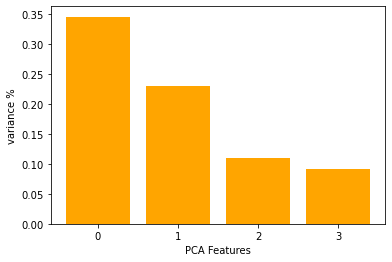

In [53]:
# Create a PCA instance: pca
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='orange')
plt.xlabel('PCA Features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

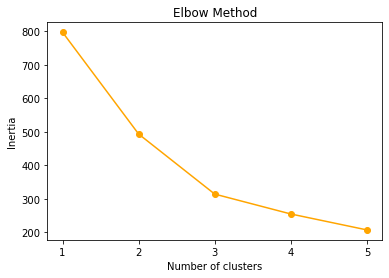

In [54]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

"""
Elbow Method
One type of PCA Technique for Checking the optimal number of clusters 
"""
from sklearn.cluster import KMeans
ks = range(1, 6)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(ks)
plt.show()

Elbow Method is also one of the method used for selecting optimal number of clusters. If there is some distance measure in previous and next cluster, then there is a need of clusters and if there is constant distance between clusters then before this point will be your optimal clusters for your dataset.

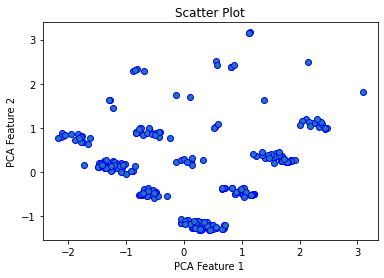

In [55]:
#Sactter Plot
PCA_components = np.array(PCA_components)
#Ploting two Features 
plt.scatter(PCA_components[:, 0], PCA_components[:,1] ,cmap = 'tab20c_r', alpha = 1, edgecolors = 'b') 
plt.title("Scatter Plot")
plt.xlabel("PCA Feature 1 ")
plt.ylabel("PCA Feature 2")
plt.show()

After converting Multi-dimensional feature of our dataset into two dimensions we are plotting these points using scatter plot. On the X-axis we take PCA Feature 1 and on the Y-axis we take feature 2.

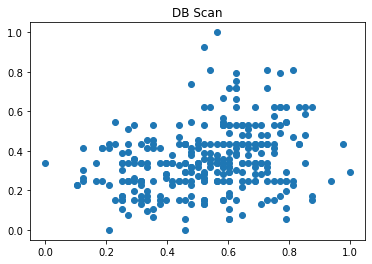

In [56]:
"""
DBScan (Used When you have to check the outliers of your datasset)
"""
model = DBSCAN(eps=3, min_samples=2)
model.fit(X)

yhat = model.fit_predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(np.array(X)[row_ix, 0], np.array(X)[row_ix, 3])
plt.title("DB Scan")
plt.show()

# 3) Clustering Algorithms

# KMeans Clustering

In this Algorithm you have to first tell your algorithm what is the value of K that means you have to tell your Algorithm how many clusters you actually want.Then the algorithm will select the random data points of length K which you assign at the beginning of your algorithm. Then the algorithm will calculate the distance of each data points with randomly selected data points and this distance measure can be Euclidian, Manhattan or any other.

In [57]:
from sklearn.cluster import KMeans

In [109]:
"""
Input Parameters for KMeans Algorithm:
1) n_clustersint, default=8
The number of clusters to form as well as the number of centroids to generate.

2) max_iter, default=300
Maximum number of iterations of the k-means algorithm for a single run.

3) init
Method for initialization:
'k-means++' : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
'random': choose n_clusters observations (rows) at random from data for the initial centroids.
If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization
"""

# Passing Parameters to KMeans Algorithm
kmeans = KMeans(n_clusters=2, max_iter=300,init='random').fit(X)

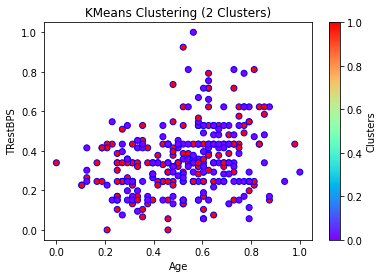

In [98]:
#Getting the Cluster Labels
labels = kmeans.labels_
 
# Visualization of K-Means Clustering
plt.scatter(X.iloc[:, 0], X.iloc[:, 3], c = labels, cmap = 'rainbow', alpha = 1, edgecolors = 'b')
plt.title("KMeans Clustering ("+str(len(np.unique(labels)))+" Clusters)")
plt.xlabel('Age')
plt.ylabel('TRestBPS')
plt.colorbar(label='Clusters')
plt.show()

# 3) Classification

# Decision Tree

Decision Tree was also used compare the results of predicting the Heart Disease Dataset. Decision Tree is s supervised machine learning model which take the features and labels and construct a tree kind shape. The constructed tree in our case is shown below. Each node in this tree represents the feature where the root node is the most relevant or important feature. The priority of features is selected based on the Information Gain which is discussed below.

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree

In [115]:
def parameterTuning(X, y, model, parameters):
    
    grid_search = GridSearchCV(model, parameters, verbose=1, cv=10)

    grid_search.fit(X, y)
    
    parameters = grid_search.best_params_
    
    return parameters

The parameters for Decision Tree was also selected by Hyper parameter tuning using GridSearchCV with 10 cross validations. The parameters which were taken into consideration for tuning are shown below.



In [116]:
parameters = {
    
    'max_leaf_nodes': list(range(10, 100)),
    'min_samples_split': [2, 3, 4, 5],
    'criterion':['gini', 'entropy'],
    'max_depth': [4,6,8,10,12]
}

parameters = parameterTuning(X, y, DecisionTreeClassifier(), parameters)

model = DecisionTreeClassifier(criterion=parameters['criterion'], max_depth=parameters['max_depth'], max_leaf_nodes=parameters['max_leaf_nodes'], min_samples_split=parameters['min_samples_split'])

Fitting 10 folds for each of 3600 candidates, totalling 36000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36000 out of 36000 | elapsed:  2.9min finished


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 13)
(242,)
(61, 13)
(61,)


In [118]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

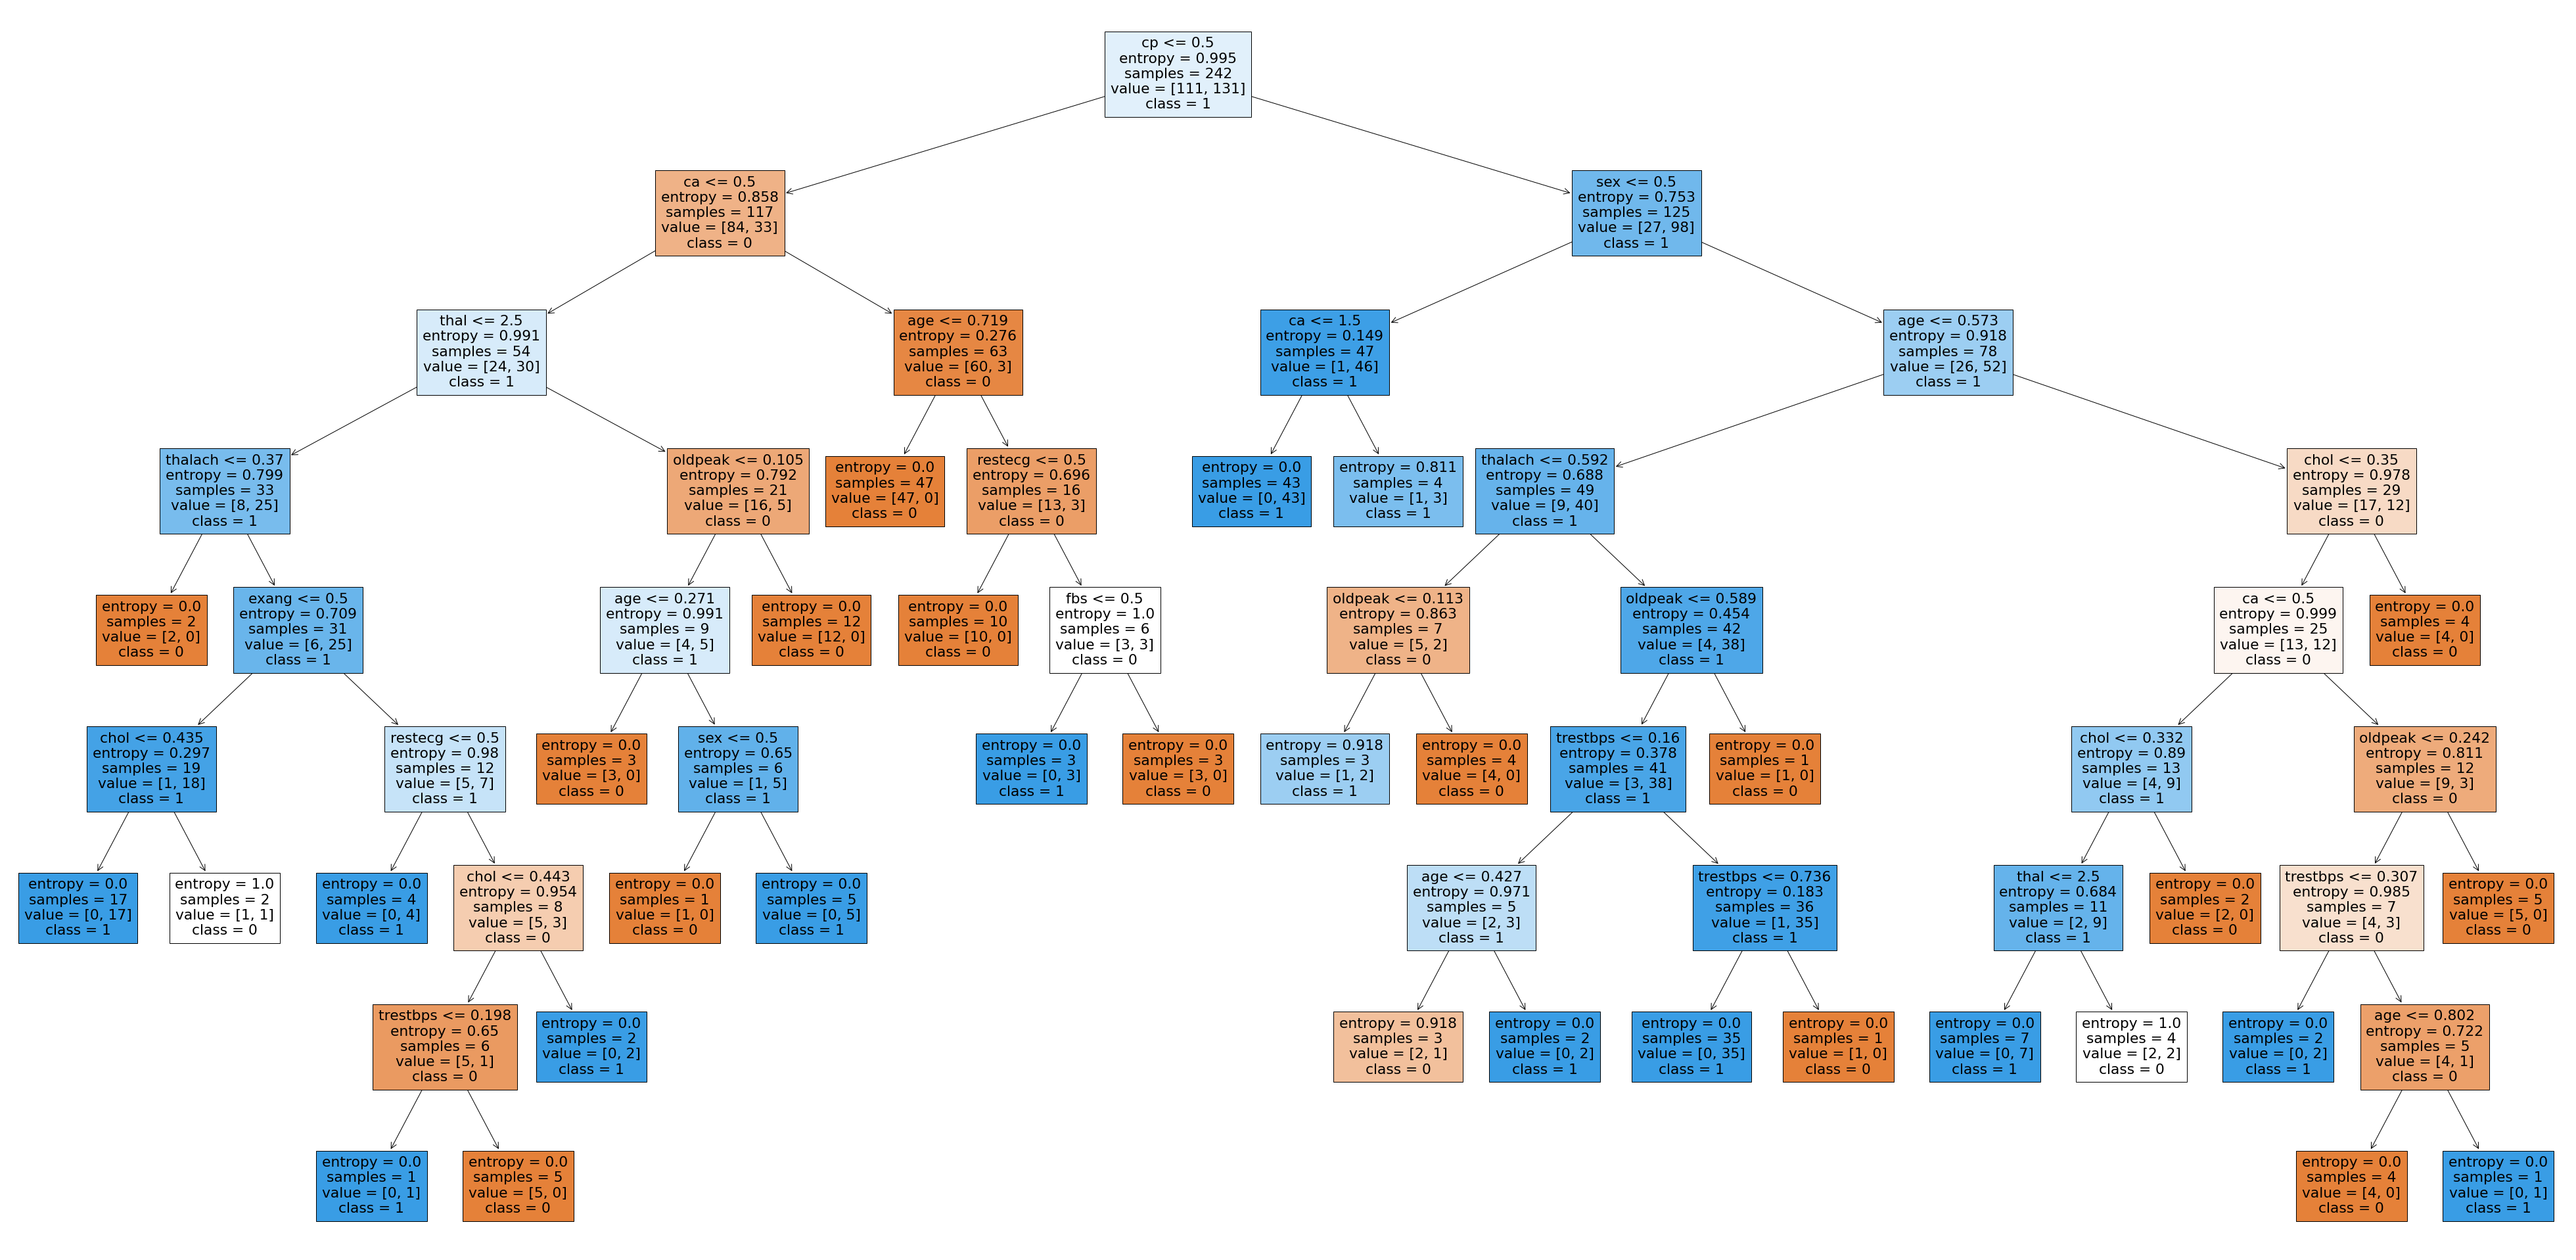

In [119]:
# DT Graph
plt.figure(figsize=(70,35))  
_ = tree.plot_tree(model, feature_names=list(X.columns), class_names=['0','1'], filled=True)
plt.savefig('tree.png')
plt.show()

In [121]:
# Accuracy
acc = accuracy_score(y_test,y_pred)
print("Accuracy: ", round(acc*100,2))

Accuracy: 78.69


In [38]:
# Precision
acc = precision_score(y_test,y_pred)
print("Precision: ", round(acc*100,2))

Precision:  86.21


In [39]:
# Recall
acc = recall_score(y_test,y_pred)
print("Recall: ", round(acc*100,2))

Recall:  73.53


In [40]:
# Classification Report
cr = classification_report(y_test,y_pred)
print("Classification Report\n\n", cr)

Classification Report

               precision    recall  f1-score   support

           0       0.72      0.85      0.78        27
           1       0.86      0.74      0.79        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



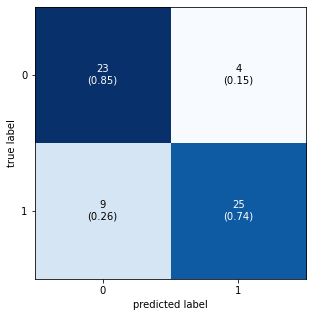

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
plt.show(plot_confusion_matrix(conf_mat=cm, colorbar=False, show_normed=True, figsize = (5,5)))

Decision Tree model is having 23 correct predictions and 4 wrong predictions for class 0 (Patients who do not have heart disease) whereas for class 1 (Patients who have heart disease) it is having 25 correct predictions and 9 wrong predictions.

# K-Nearest Neighbours

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from mlxtend.plotting import plot_confusion_matrix

In [43]:
def parameterTuning(X, y, model, parameters):
    
    grid_search = GridSearchCV(model, parameters, verbose=1, cv=10)

    grid_search.fit(X, y)
    
    parameters = grid_search.best_params_
    
    return parameters

In [44]:
k_range = list(range(1, 25))

parameters = {
        'n_neighbors' : k_range,
        'algorithm' : ['auto','kd_tree','ball_tree','brute'],
        'weights' : ['uniform', 'distance'],
        'metric' : ['euclidean','manhattan','minkowski','l1','l2']
        }

parameters = parameterTuning(X, y, KNeighborsClassifier(), parameters)

#create a new KNN model
model = KNeighborsClassifier(n_neighbors = parameters['n_neighbors'], metric=parameters['metric'], weights=parameters['weights'], algorithm=parameters['algorithm'])

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9600 out of 9600 | elapsed:   52.9s finished


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 13)
(242,)
(61, 13)
(61,)


In [46]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [47]:
# Accuracy
acc = accuracy_score(y_test,y_pred)
print("Accuracy: ", round(acc*100,2))

Accuracy:  85.25


In [48]:
# Precision
acc = precision_score(y_test,y_pred)
print("Precision: ", round(acc*100,2))

Precision:  82.05


In [49]:
# Recall
acc = recall_score(y_test,y_pred)
print("Recall: ", round(acc*100,2))

Recall:  94.12


In [50]:
# Classification Report
cr = classification_report(y_test,y_pred)
print("Classification Report\n\n", cr)

Classification Report

               precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.82      0.94      0.88        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



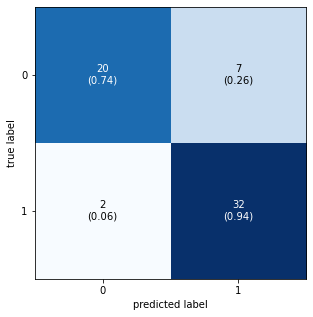

In [51]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
plt.show(plot_confusion_matrix(conf_mat=cm, colorbar=False, show_normed=True, figsize = (5,5)))